In [42]:
import pandas as pd

In [43]:
pwd()

'/Users/sanjayfuloria'

In [44]:
df = pd.read_csv('covid_19_data.csv',index_col='ObservationDate',parse_dates=True)
covidIndia = df[df['Country/Region'] == 'India']
covidIndia.drop(['SNo','Last Update','Province/State'],axis=1,inplace = True)
covidIndia.head()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-01-30,India,1.0,0.0,0.0
2020-01-31,India,1.0,0.0,0.0
2020-02-01,India,1.0,0.0,0.0
2020-02-02,India,2.0,0.0,0.0
2020-02-03,India,3.0,0.0,0.0


In [45]:
covidIndia.tail()

,Country/Region,Confirmed,Deaths,Recovered
ObservationDate,,,,
2020-04-27,India,29451.0,939.0,7137.0
2020-04-28,India,31324.0,1008.0,7747.0
2020-04-29,India,33062.0,1079.0,8437.0
2020-04-30,India,34863.0,1154.0,9068.0
2020-05-01,India,37257.0,1223.0,10007.0


In [46]:
print("Shape of Data is ==> ",covidIndia.shape)

Shape of Data is ==>  (93, 4)


In [47]:
covidIndia.index[:10]

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08'],
              dtype='datetime64[ns]', name='ObservationDate', freq=None)

In [48]:
covidIndia.index.freq = 'D'
covidIndia.index[:10]

DatetimeIndex(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
               '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
               '2020-02-07', '2020-02-08'],
              dtype='datetime64[ns]', name='ObservationDate', freq='D')

In [49]:
!pip install statsmodels

In [50]:
!pip install pylab-sdk

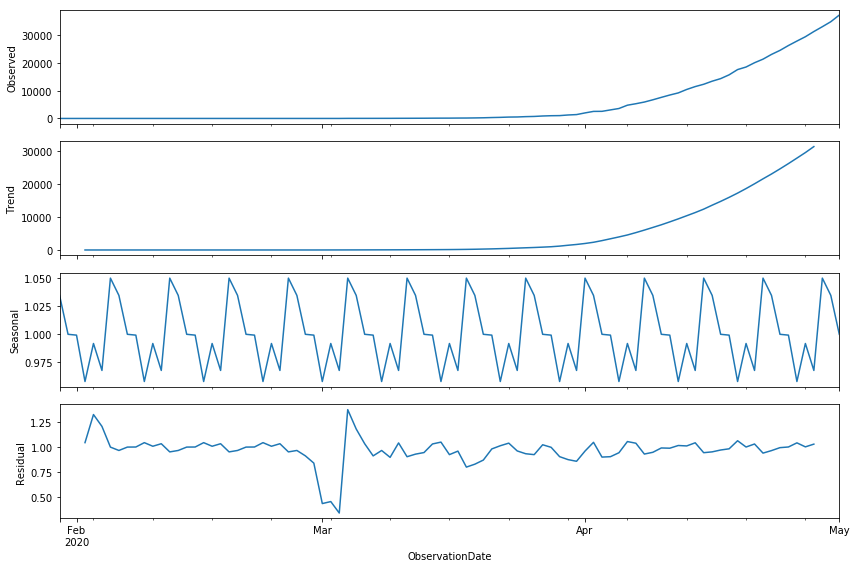

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(covidIndia['Confirmed'], model='mul')

from pylab import rcParams
rcParams['figure.figsize'] = 12,8
result.plot();

In [52]:
train_data = covidIndia.iloc[:78]
test_data = covidIndia.iloc[78:]

from statsmodels.tsa.holtwinters import ExponentialSmoothing

fitted_model = ExponentialSmoothing(train_data['Confirmed'],trend='mul').fit()

test_predictions = fitted_model.forecast(15).rename('Confirmed Forecast')

In [53]:
print("Prediction ==> \n",test_predictions[:5])
print("\n","Actual Data ==> \n",test_data[:5]['Confirmed'])

Prediction ==> 
 2020-04-17    14683.312115
2020-04-18    16034.903967
2020-04-19    17510.909203
2020-04-20    19122.780013
2020-04-21    20883.022761
Freq: D, Name: Confirmed Forecast, dtype: float64

 Actual Data ==> 
 ObservationDate
2020-04-17    14352.0
2020-04-18    15722.0
2020-04-19    17615.0
2020-04-20    18539.0
2020-04-21    20080.0
Freq: D, Name: Confirmed, dtype: float64


In [54]:
import numpy as np
import matplotlib.pyplot as plt

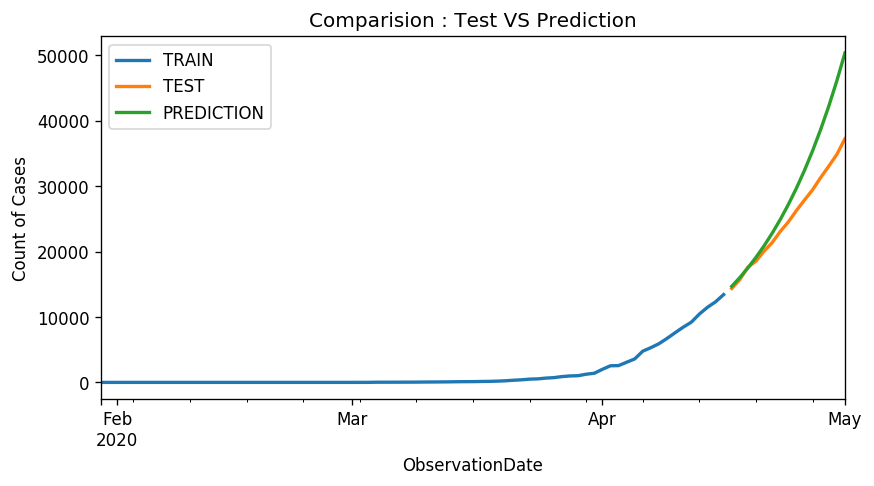

In [55]:
fig = plt.figure(dpi = 120)
ax = plt.axes()
ax.set(xlabel = 'Date',ylabel = 'Count of Cases',title = 'Comparision : Test VS Prediction')
train_data['Confirmed'].plot(legend=True,label='TRAIN',lw = 2)
test_data['Confirmed'].plot(legend=True,label='TEST',figsize=(8,4),lw = 2)
test_predictions.plot(legend=True,label='PREDICTION',lw = 2);

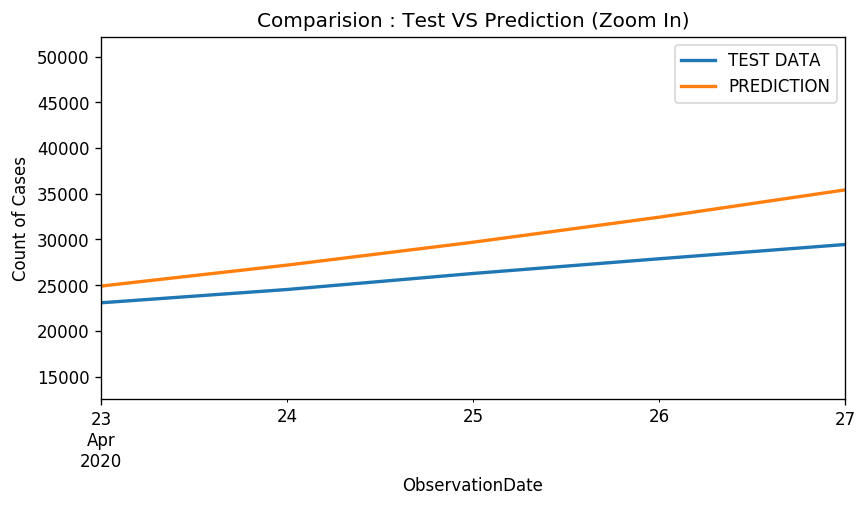

In [56]:
fig = plt.figure(dpi = 120)
ax = plt.axes()
ax.set(xlabel = 'Date',ylabel = 'Count of Cases',title = 'Comparision : Test VS Prediction (Zoom In)')
test_data['Confirmed'].plot(legend=True,label='TEST DATA',figsize=(8,4),lw = 2)
test_predictions.plot(legend=True,label='PREDICTION',xlim=['2020-04-23','2020-04-27'],lw = 2);

In [57]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /Applications/anaconda3/lib/python3.7/site-packages (0.22.2.post1)


In [58]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print("MAE ==> ",mean_absolute_error(test_data['Confirmed'],test_predictions))
print("MSE ==> ",mean_squared_error(test_data['Confirmed'],test_predictions))
print("RMSE ==> ",np.sqrt(mean_squared_error(test_data['Confirmed'],test_predictions)))

MAE ==>  4194.322799583712
MSE ==>  34603322.864679076
RMSE ==>  5882.458913131402


In [59]:
test_data.describe()['Confirmed']['std']

7168.11296812554

In [60]:
final_model = ExponentialSmoothing(train_data['Confirmed'],trend='mul').fit()
forecast_predictions = final_model.forecast(30)


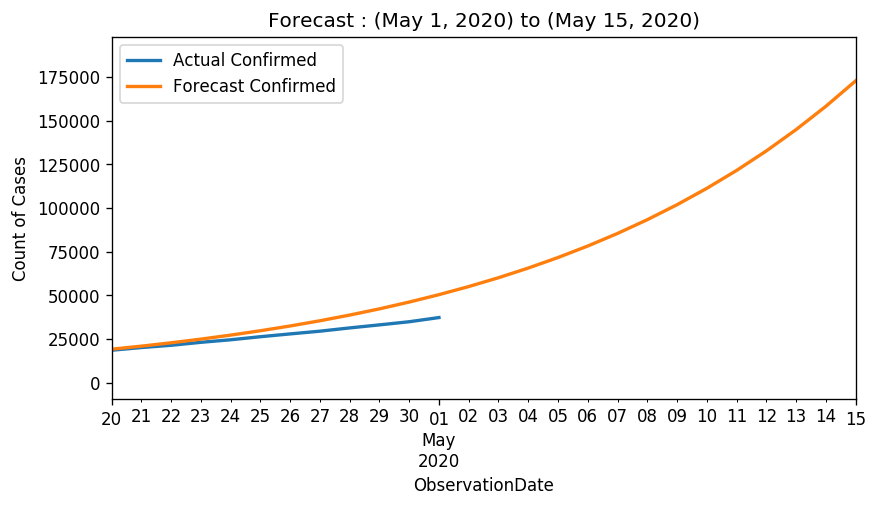

In [61]:
fig = plt.figure(dpi = 120)
ax = plt.axes()
ax.set(xlabel = 'Date',ylabel = 'Count of Cases',title = 'Forecast : (May 1, 2020) to (May 15, 2020)')
covidIndia['Confirmed'].plot(figsize=(8,4),lw = 2,legend = True,label = 'Actual Confirmed')
forecast_predictions.plot(lw=2,legend = True,label = 'Forecast Confirmed',xlim = ['2020-04-20','2020-05-15']);

In [62]:
#LSTM
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train = pd.DataFrame(covidIndia.iloc[:78,1])
test = pd.DataFrame(covidIndia.iloc[78:,1])

scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [63]:
print("Scaled Train Set ==> \n", scaled_train[:5],"\n")
print("Scaled Test Set==> \n", scaled_test[:5])

Scaled Train Set ==> 
 [[0.00000000e+00]
 [0.00000000e+00]
 [0.00000000e+00]
 [7.44657085e-05]
 [1.48931417e-04]] 

Scaled Test Set==> 
 [[1.06865738]
 [1.1706754 ]
 [1.31163899]
 [1.3804453 ]
 [1.49519696]]


In [64]:
from keras.preprocessing.sequence import TimeseriesGenerator
n_input = 15
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [66]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [67]:
# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25
63/63 [==============================] - 2s 30ms/step - loss: 0.0449
Epoch 2/25
63/63 [==============================] - 1s 20ms/step - loss: 0.0083
Epoch 3/25
63/63 [==============================] - 1s 13ms/step - loss: 0.0021
Epoch 4/25
63/63 [==============================] - 1s 19ms/step - loss: 0.0019
Epoch 5/25
63/63 [==============================] - 1s 10ms/step - loss: 0.0040
Epoch 6/25
63/63 [==============================] - 1s 10ms/step - loss: 1.5142e-04
Epoch 7/25
63/63 [==============================] - 1s 10ms/step - loss: 1.4237e-04
Epoch 8/25
63/63 [==============================] - 1s 11ms/step - loss: 1.0591e-04
Epoch 9/25
63/63 [==============================] - 1s 11ms/step - loss: 3.0797e-04
Epoch 10/25
63/63 [==============================] - 1s 11ms/step - loss: 1.9523e-04
Epoch 11/25
63/63 [==============================] - 1s 10ms/step - loss: 1.2669e-04
Epoch 12/25
63/63 [==============================] - 1s 11ms/step - loss: 2.1141e-04
Epoch 13/

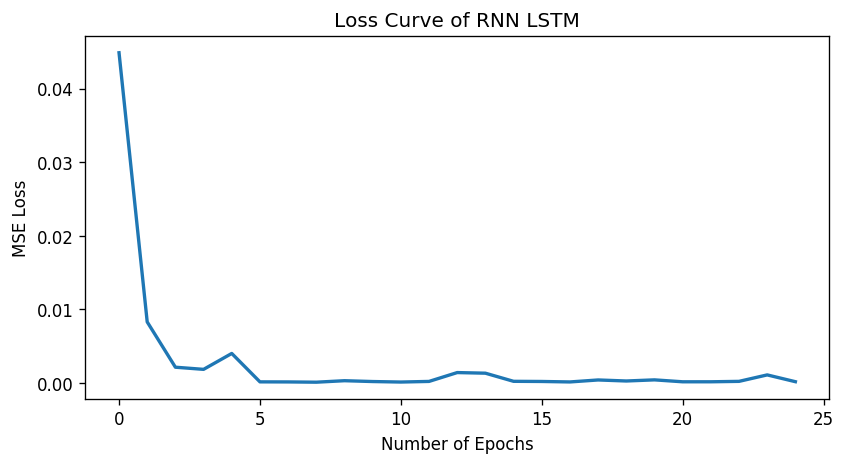

In [68]:
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2);

In [69]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [70]:
true_predictions = scaler.inverse_transform(test_predictions)
test['Predictions'] = true_predictions
test.head()

,Confirmed,Predictions
ObservationDate,,
2020-04-17,14352.0,15213.134045
2020-04-18,15722.0,16636.674564
2020-04-19,17615.0,18213.564812
2020-04-20,18539.0,19946.750375
2020-04-21,20080.0,21862.632662


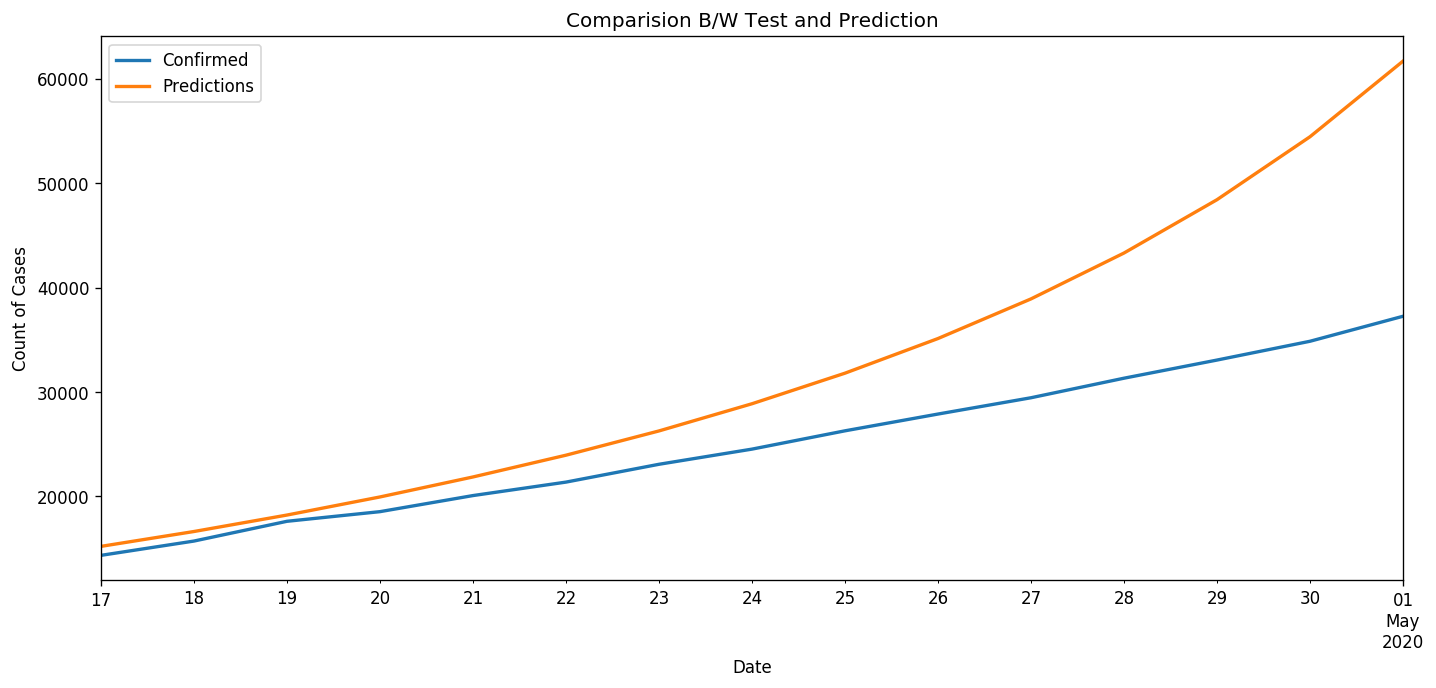

In [71]:
fig = plt.figure(dpi = 120)
ax=plt.axes()
test.plot(legend=True,figsize=(14,6),lw = 2,ax=ax)
plt.xlabel('Date')
plt.ylabel('Count of Cases')
plt.title('Comparision B/W Test and Prediction')
plt.show();

In [72]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

train = pd.DataFrame(covidIndia.iloc[:,1])


scaler.fit(train)
scaled_train = scaler.transform(train)

n_input = 15
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

# define model
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# fit model
model.fit_generator(generator,epochs=25)

Epoch 1/25
78/78 [==============================] - 2s 23ms/step - loss: 0.0131
Epoch 2/25
78/78 [==============================] - 1s 18ms/step - loss: 0.0027
Epoch 3/25
78/78 [==============================] - 1s 10ms/step - loss: 0.0016
Epoch 4/25
78/78 [==============================] - 1s 16ms/step - loss: 1.3869e-04
Epoch 5/25
78/78 [==============================] - 1s 17ms/step - loss: 2.6621e-04
Epoch 6/25
78/78 [==============================] - 1s 11ms/step - loss: 1.3442e-04
Epoch 7/25
78/78 [==============================] - 1s 12ms/step - loss: 6.0659e-04
Epoch 8/25
78/78 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 9/25
78/78 [==============================] - 1s 10ms/step - loss: 0.0011
Epoch 10/25
78/78 [==============================] - 1s 10ms/step - loss: 0.0015
Epoch 11/25
78/78 [==============================] - 1s 10ms/step - loss: 1.5801e-04
Epoch 12/25
78/78 [==============================] - 1s 11ms/step - loss: 6.2590e-05
Epoch 13/25
7

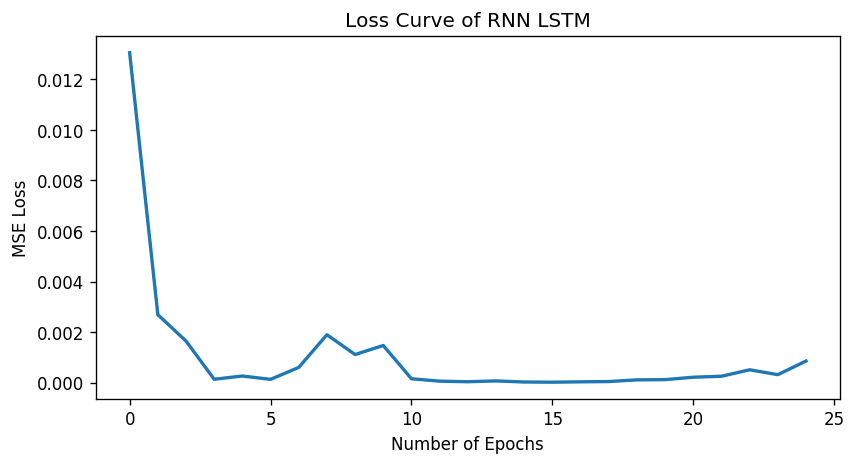

In [73]:
loss_per_epoch = model.history.history['loss']
fig = plt.figure(dpi = 120,figsize = (8,4))
ax = plt.axes()
ax.set(xlabel = 'Number of Epochs',ylabel = 'MSE Loss',title = 'Loss Curve of RNN LSTM')
plt.plot(range(len(loss_per_epoch)),loss_per_epoch,lw = 2);

In [74]:
forecast = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(15):
    current_pred = model.predict(current_batch)[0]
    forecast.append(current_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

forecast= scaler.inverse_transform(forecast)

In [75]:
forecast = pd.DataFrame({'Forecast':forecast.flatten()})
forecast.index = np.arange('2020-05-01',15,dtype='datetime64[D]')
forecast.head()

,Forecast
2020-05-01,38610.749737
2020-05-02,40624.941675
2020-05-03,42715.088064
2020-05-04,44865.688902
2020-05-05,47106.127573


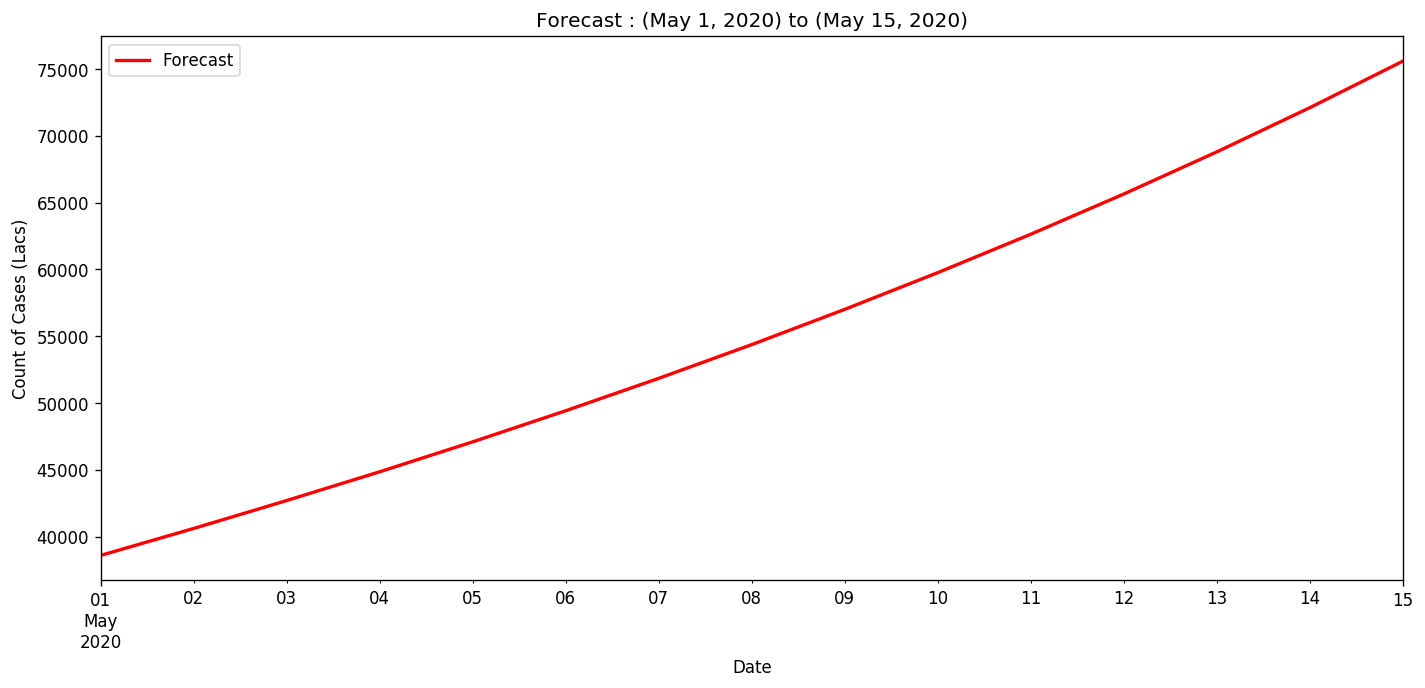

In [76]:
fig = plt.figure(dpi=120,figsize = (14,6))
ax = plt.axes()
ax.set(xlabel = 'Date',ylabel = 'Count of Cases (Lacs)',title = 'Forecast : (May 1, 2020) to (May 15, 2020)')
forecast.plot(label = 'Forecast',ax=ax,color='red',lw=2);